In [1]:
#Data
import pandas as pd
import numpy as np

#Dataviz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

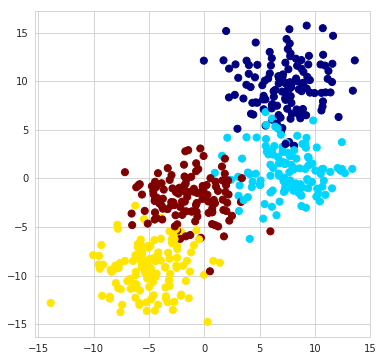

In [4]:
X,y = make_blobs(n_samples = 500, centers=4, random_state = 8, cluster_std= 2.4)

plt.figure(figsize = (6,6))
plt.scatter(X[:,0],X[:,1],c=y,s= 50, cmap="jet")

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)

/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


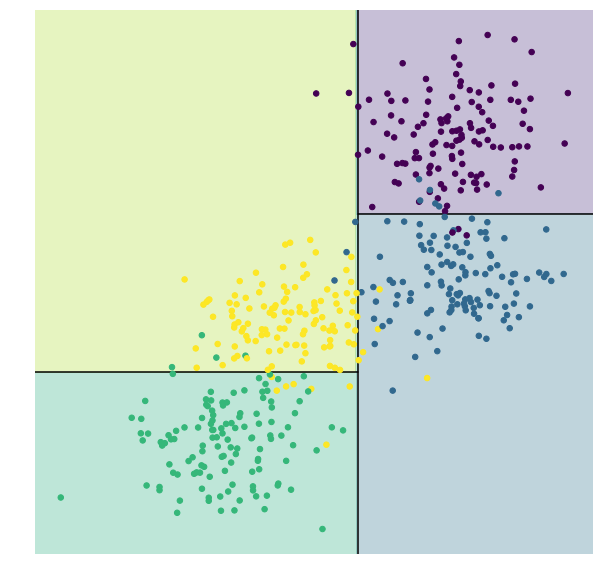

In [9]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
plt.figure(figsize=(10,10))
visualize_tree(clf,X,y)

/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


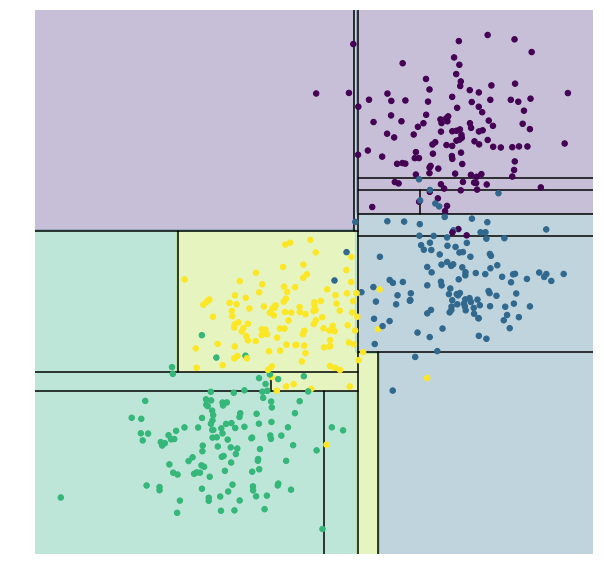

In [10]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
plt.figure(figsize=(10,10))
visualize_tree(clf,X,y)

OVERFITTING!

In [11]:
from sklearn.ensemble import RandomForestClassifier

/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


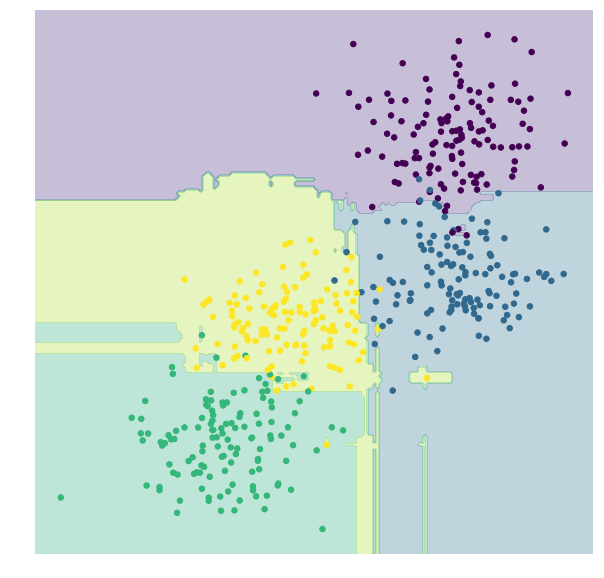

In [14]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)
plt.figure(figsize=(10,10))
visualize_tree(clf,X,y,boundaries=False)

In [38]:
x = 10 * np.random.rand(100)

In [39]:
x

array([5.07244644, 3.0227218 , 6.94177777, 8.94702547, 5.72805914,
       3.15022324, 4.89931247, 6.09829259, 9.25820579, 2.77462885,
       9.87504055, 2.14776648, 4.92826414, 4.00157071, 3.7369596 ,
       6.753228  , 0.09298408, 9.37875475, 7.16620647, 1.79844803,
       0.57681362, 8.70106137, 3.35474928, 5.2703111 , 4.9609475 ,
       8.63744117, 4.26365864, 7.41518228, 5.57434299, 1.13115607,
       3.78576014, 6.06501651, 1.93751696, 0.22873131, 5.95471907,
       3.14633508, 2.0624815 , 7.49722356, 0.2564541 , 8.43257882,
       7.79944546, 4.13874446, 2.98755044, 0.19289655, 7.54191667,
       6.229593  , 6.70335781, 1.96534753, 3.75648225, 9.80335733,
       6.90331771, 9.17690787, 3.69089941, 2.82305665, 6.16788786,
       1.09275429, 0.04440727, 4.45819491, 7.96602019, 9.9237274 ,
       6.36457509, 7.71349186, 1.45462627, 2.19078487, 4.85000249,
       4.52076478, 2.99004856, 1.34339072, 5.81739699, 8.3018905 ,
       1.25304278, 3.82113982, 6.51318875, 6.86296971, 4.73982

In [40]:
def sin_model(x,sigma=0.2):
    
    noise = sigma * np.random.rand(len(x))
    
    return np.sin(5*x) + np.sin(0.05*x) + noise

In [41]:
y = sin_model(x)

<ErrorbarContainer object of 3 artists>

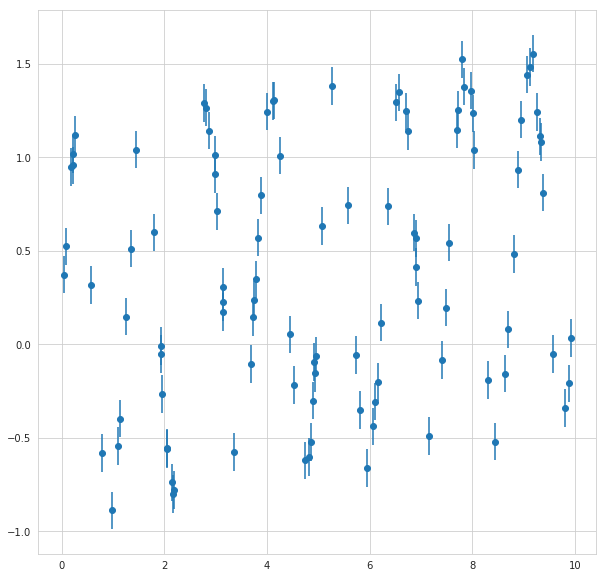

In [42]:
plt.figure(figsize=(10,10))
plt.errorbar(x,y,0.1,fmt='o')

In [43]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0,10,100) #The data that we know

In [44]:
rfr = RandomForestRegressor(100)

rfr.fit(x[:,None],y) #The data that we don't know

yfit = rfr.predict(xfit[:,None])

In [45]:
ytrue = sin_model(xfit,0)

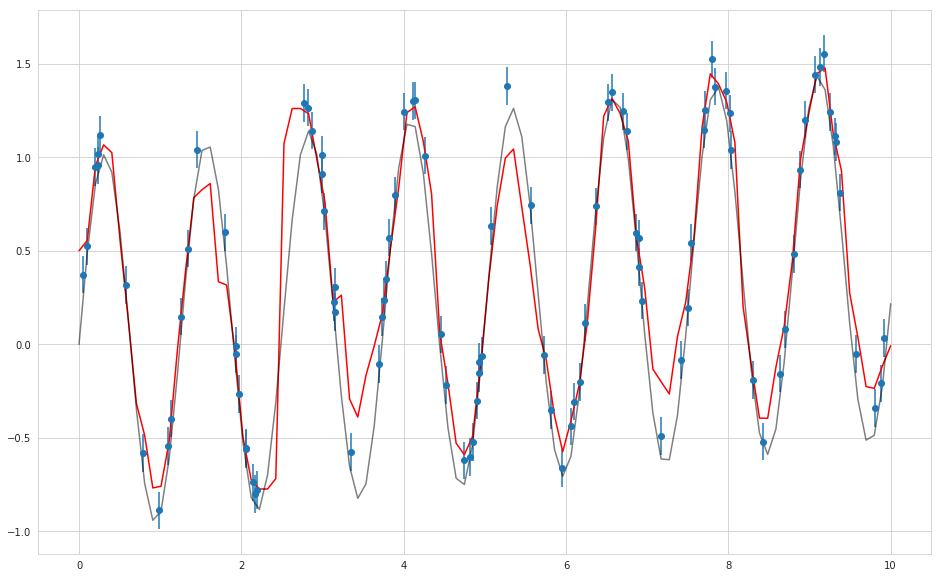

In [47]:
plt.figure(figsize=(16,10))
plt.errorbar(x,y,0.1,fmt='o')

plt.plot(xfit,yfit,"-r")

plt.plot(xfit,ytrue,"-k",alpha = 0.5)